# Assignment 4: PSA's and Heuristic Search

Constanza Marini Macouzet A01332485

Alicia Huidobro Espejel A01749803

Diana Laura Aguilar Cervantes A01751168

Campus Estado de México

## Push and Pull Puzzle

Push and Pull puzzle is a simple board game in which an agent piece A must move a target piece T from an arbitrary position to a goal position X on the board. Also, there are obstacles that impedes the agent piece to reach its mission easily; these obstacles can be movable M or fixed O.

The first thing to do, in order to run the problem solving agent using informed search, is to import the file "search".

The other commands are used for counting the time.

In [22]:
from search import *
import copy
from time import perf_counter, sleep

Then, we implement the method "print_sate" which, as its name says it, prints the state. If some piece is over the goal, it will get underlined.

Afterwards, the most important part of the code: the definition of the problem. "PushPullPuzzle" has all the rules of the game and what happens when an action has taken place. Here, it is stated that the agent piece can move up, down, left and right when there is nothing on its path of movement. Also, the agent piece can pull or push the T and M pieces, but only when there is a blank space in the direction the action is going to occure.

At the end, the "goal_test" method is defined. This method checks the position of the T piece, if the T is on the same position as the X, then that state is a goal.

In [23]:
nodes_visited = 0
nodes_generated = 0

def print_state(state, goal_location):
    goal_x, goal_y = goal_location
    
    print("+ 1 2 3 4 +")
    for x in range(4):
        row = []
        for y in range(4):
            c = state[x][y]
            if x == goal_x and y == goal_y:
                if c == 'A':
                    row.append('A\u0332')
                elif c == 'T':
                    row.append('T\u0332')
                elif c == 'M':
                    row.append('M\u0332')
                elif c == '-':
                    row.append('x')
                else:
                    raise Exception("Unknown character in goal location: %s" % c)
            else:
                row.append(c)
        print(str(x+1) + " " + " ".join(row) + " " + str(x+1))
        
    print("+ 1 2 3 4 +")

class PushPullPuzzle(Problem):    
    def actions(self, state):
        actions = []
        
        x = y = None
        for i in range(4):
            for j in range(4):
                if state[i][j] == 'A':
                    x = i
                    y = j
                    break
            if not x is None:
                break
                
        if x > 0 and state[x-1][y] == '-':
            actions.append('up')
        if y > 0 and state[x][y-1] == '-':
            actions.append('left')
        if x < 3 and state[x+1][y] == '-':
            actions.append('down')
        if y < 3 and state[x][y+1] == '-':
            actions.append('right')
            
        if x > 1 and (state[x-1][y] in ['T', 'M']) and state[x-2][y] == '-':
            actions.append('push_up')
        if y > 1 and (state[x][y-1] in ['T', 'M']) and state[x][y-2] == '-':
            actions.append('push_left')
        if x < 2 and (state[x+1][y] in ['T', 'M']) and state[x+2][y] == '-':
            actions.append('push_down')
        if y < 2 and (state[x][y+1] in ['T', 'M']) and state[x][y+2] == '-':
            actions.append('push_right')
            
        if x > 0 and x < 3 and (state[x+1][y] in ['T', 'M']) and state[x-1][y] == '-':
            actions.append('pull_up')
        if y > 0 and y < 3 and (state[x][y+1] in ['T', 'M']) and state[x][y-1] == '-':
            actions.append('pull_left')
        if x > 0 and x < 3 and (state[x-1][y] in ['T', 'M']) and state[x+1][y] == '-':
            actions.append('pull_down')
        if y > 0 and y < 3 and (state[x][y-1] in ['T', 'M']) and state[x][y+1] == '-':
            actions.append('pull_right')
        
        return actions
    
    def result(self, state, action):
        new_state = list(state)
        for i in range(4):
            new_state[i] = list(new_state[i])
        
        x = y = None
        for i in range(4):
            for j in range(4):
                if state[i][j] == 'A':
                    x = i
                    y = j
                    break
            if not x is None:
                break
                
        try:
            if action == 'up':
                if state[x-1][y] != '-':
                    raise Exception('Cant move up: %s' % state)

                new_state[x-1][y] = new_state[x][y]
                new_state[x][y] = '-'
            elif action == 'left':
                if state[x][y-1] != '-':
                    raise Exception('Cant move left: %s' % state)

                new_state[x][y-1] = new_state[x][y]
                new_state[x][y] = '-'
            elif action == 'down':
                if state[x+1][y] != '-':
                    raise Exception('Cant move down: %s' % state)

                new_state[x+1][y] = new_state[x][y]
                new_state[x][y] = '-'
            elif action == 'right':
                if state[x][y+1] != '-':
                    raise Exception('Cant move right: %s' % state)

                new_state[x][y+1] = new_state[x][y]
                new_state[x][y] = '-'

            elif action == 'push_up':
                if not(state[x-1][y] in ['T', 'M']) or state[x-2][y] != '-':
                    raise Exception('Cant push up: %s' % state)

                new_state[x-2][y] = new_state[x-1][y]
                new_state[x-1][y] = new_state[x][y]
                new_state[x][y] = '-'
            elif action == 'push_left':
                if not(state[x][y-1] in ['T', 'M']) or state[x][y-2] != '-':
                    raise Exception('Cant push left: %s' % state)

                new_state[x][y-2] = new_state[x][y-1]
                new_state[x][y-1] = new_state[x][y]
                new_state[x][y] = '-'
            elif action == 'push_down':
                if not(state[x+1][y] in ['T', 'M']) or state[x+2][y] != '-':
                    raise Exception('Cant push down: %s' % state)

                new_state[x+2][y] = new_state[x+1][y]
                new_state[x+1][y] = new_state[x][y]
                new_state[x][y] = '-'
            elif action == 'push_right':
                if not(state[x][y+1] in ['T', 'M']) or state[x][y+2] != '-':
                    raise Exception('Cant push right: %s' % state)

                new_state[x][y+2] = new_state[x][y+1]
                new_state[x][y+1] = new_state[x][y]
                new_state[x][y] = '-'

            elif action == 'pull_up':
                if not(state[x+1][y] in ['T', 'M']) or state[x-1][y] != '-':
                    raise Exception('Cant pull up: %s' % state)

                new_state[x-1][y] = new_state[x][y]
                new_state[x][y] = new_state[x+1][y]
                new_state[x+1][y] = '-'
            elif action == 'pull_left':
                if not(state[x][y+1] in ['T', 'M']) or state[x][y-1] != '-':
                    raise Exception('Cant pull left: %s' % state)

                new_state[x][y-1] = new_state[x][y]
                new_state[x][y] = new_state[x][y+1]
                new_state[x][y+1] = '-'
            elif action == 'pull_down':
                if not(state[x-1][y] in ['T', 'M']) or state[x+1][y] != '-':
                    raise Exception('Cant pull down: %s' % state)

                new_state[x+1][y] = new_state[x][y]
                new_state[x][y] = new_state[x-1][y]
                new_state[x-1][y] = '-'
            elif action == 'pull_right':
                if not(state[x][y-1] in ['T', 'M']) or state[x][y+1] != '-':
                    raise Exception('Cant pull right: %s' % state)

                new_state[x][y+1] = new_state[x][y]
                new_state[x][y] = new_state[x][y-1]
                new_state[x][y-1] = '-'
        except IndexError:
            raise Exception('Cant execute action %s: %s' % (action, state))
        
        tups = []
        for i in range(4):
            tups.append(tuple(new_state[i]))
        
        global nodes_generated
        nodes_generated += 1
        return tuple(tups)
        
    def goal_test(self, state):
        global nodes_generated
        global nodes_visited
        global t1_start
        global t1_middle
        global max_seconds
        
        x = y = None
        for i in range(4):
            for j in range(4):
                if state[i][j] == 'T':
                    x = i
                    y = j
                    break
            if not x is None:
                break
                
        
        nodes_visited += 1
        if nodes_visited == 1:
            sys.stdout.write("Visited: {:>12}, Generated: {:>12} ({}s)".format(nodes_visited, nodes_generated, 0))
        
        sys.stdout.write("\r")
        sys.stdout.write("Visited: {:>12}, Generated: {:>12} ({}s)".format(nodes_visited, nodes_generated, format(round(t1_middle - t1_start, 2), '.2f')))
        sys.stdout.flush()
            
        if nodes_visited % 500 == 0:
            t1_middle = perf_counter()
            if t1_middle - t1_start > max_seconds:
                raise ValueError("Too long to solve")
            
        
        if [x, y] == self.goal:
            nodes_generated = 0
            nodes_visited = 0
            return True
        return False
    
    def h1(self, node):
        
        A_x = A_y = None
        for i in range(4):
            for j in range(4):
                if node.state[i][j] == 'A':
                    A_x = i
                    A_y = j
                    break
            if not A_x is None:
                break
        
        T_x = T_y = None
        for i in range(4):
            for j in range(4):
                if node.state[i][j] == 'T':
                    T_x = i
                    T_y = j
                    break
            if not T_x is None:
                break
        
        A_T_mhd = abs(A_x - T_x) + abs(A_y - T_y)
        T_G_mhd = abs(T_x - self.goal[0]) + abs(T_y - self.goal[1])
        obstacles = 0

        for x in range(A_x, T_x + 1):
            for y in range(A_y, T_y + 1):
                if node.state[x][y] == 'M' or node.state[x][y] == 'O':
                    obstacles += 1  # number of obstacles in the path A-T
        for x in range(T_x, self.goal[0] + 1):
            for y in range(T_y, self.goal[1] + 1):
                if node.state[x][y] == 'M' or node.state[x][y] == 'O':
                    obstacles += 1  # number of obstacles in the path T-G

        h1 = A_T_mhd + T_G_mhd + obstacles

        return h1
    
    def h2(self, node):
        
        A_x = A_y = None
        for i in range(4):
            for j in range(4):
                if node.state[i][j] == 'A':
                    A_x = i
                    A_y = j
                    break
            if not A_x is None:
                break
        
        T_x = T_y = None
        for i in range(4):
            for j in range(4):
                if node.state[i][j] == 'T':
                    T_x = i
                    T_y = j
                    break
            if not T_x is None:
                break
        
        obstacles = 0
        for i in range(4):
            for j in range(4):
                if node.state[i][j] == 'M' or node.state[i][j] == 'O':
                    obstacles += 1
        
        prob_obs = obstacles / 16
        
        A_T_mhd = abs(A_x - T_x) + abs(A_y - T_y)
        T_G_mhd = abs(T_x - self.goal[0]) + abs(T_y - self.goal[1])

        h2 = A_T_mhd + T_G_mhd + prob_obs * (A_T_mhd + T_G_mhd)

        return h2

## Heuristics description
Below we describe the three heuristics that we designed and used. The code of the 2 heuristics is above.

### Heuristic 1:
**h1 = A_T_mhd + T_G_mhd + obstacles**

This heuristic sums:
- the Manhattan distance from the agent piece (A) to the target piece (T)
- the Manhattan distance from the target piece (T) to the goal position (G)
- The number of obstacles in the mentioned paths (A to T and T to G)

### Heuristic 2
**h3 = A_T_mhd + T_G_mhd + prob_obs * (A_T_mhd + T_G_mhd)**

This heuristic is simmilar to heuristic 1, but instead of considering the number of obstacles it considers the probability to find an obstacle. Heuristic 2 sums:
- the Manhattan distance from the agent piece (A) to the target piece (T)
- the Manhattan distance from the target piece (T) to the goal position (G)
- The probability to find obstacles in the two mentioned paths (A to T and T to G). The probability is equal to the number of obstacles in the two paths divided in the total number of cells on the board (16)

## Outputs

Once the boards, the goal location and the search algorithm are given, the program is run. The outputs are going to be: 

1. The nodes visited (where the goal test is made)
2. The nodes generated
3. The time it took the program to find a solution
4. The number of steps from the initial state to the goal state
5. The path and actions from the initial state to the goal state

If a solution is not found under 10 minutes, the program will stop and print a message.
If the problem does not have a solution, the program will print the message "No solution".

In [24]:
boards = [
    # Board 1
    (
        ('A', '-', '-', '-'),
        ('-', '-', '-', '-'),
        ('-', '-', '-', '-'),
        ('-', 'T', '-', '-')
    ),
    # Board 2
    (
        ('-', '-', '-', '-'),
        ('-', '-', 'T', '-'),
        ('O', 'M', 'M', 'M'),
        ('A', '-', '-', '-')
    ),
    # Board 3
    (
        ('-', '-', '-', 'A'),
        ('-', '-', 'T', '-'),
        ('O', 'O', 'M', '-'),
        ('-', '-', '-', '-'),
        ('-', '-', '-', '-')
    ),
    # Board 4
    (
        ('A', '-', '-', '-'),
        ('-', '-', 'M', 'T'),
        ('O', 'M', '-', 'O'),
        ('-', '-', '-', '-')
    ),
    # Impossible board
    (
        ('-', '-', '-', 'A'),
        ('-', '-', '-', '-'),
        ('O', 'T', 'O', 'O'),
        ('-', '-', '-', '-')
    )
]
goal_location = [3,3]
puzzle = PushPullPuzzle(boards[0], goal_location)
    
try:
    ## Search method
    max_seconds = 600
    t1_start = perf_counter() # Start counting time
    t1_middle = perf_counter()

    # goal_node = astar_search(puzzle, puzzle.h1)
    # goal_node = recursive_best_first_search(puzzle, puzzle.h1)
    # goal_node = best_first_graph_search(puzzle, puzzle.h1)
    goal_node = astar_search(puzzle, puzzle.h2)
    # goal_node = recursive_best_first_search(puzzle, puzzle.h2)
    # goal_node = best_first_graph_search(puzzle, puzzle.h2)

    t1_stop = perf_counter() # Stop counting time
    print("")
    print("Finished in %s seconds" % round(t1_stop - t1_start, 2))
    if not goal_node is None:
        solution = goal_node.solution()
        path = goal_node.path()
        print("Goal found in %s steps." % len(path))
        for j in range(len(path)):
            if j < len(path) - 1:
                print("%s: %s" % (j, solution[j]))
            else:
                print("%s: GOAL!" % j)
            print_state(path[j].state, goal_location)
    else:
        print("No solution found.")
except ValueError:
    print("")
    print("Stopped. Did not find a solution under %s seconds." % max_seconds)

Visited:            7, Generated:           14 (0.00s)
Finished in 0.02 seconds
Goal found in 6 steps.
0: down
+ 1 2 3 4 +
1 A - - - 1
2 - - - - 2
3 - - - - 3
4 - T - x 4
+ 1 2 3 4 +
1: down
+ 1 2 3 4 +
1 - - - - 1
2 A - - - 2
3 - - - - 3
4 - T - x 4
+ 1 2 3 4 +
2: down
+ 1 2 3 4 +
1 - - - - 1
2 - - - - 2
3 A - - - 3
4 - T - x 4
+ 1 2 3 4 +
3: push_right
+ 1 2 3 4 +
1 - - - - 1
2 - - - - 2
3 - - - - 3
4 A T - x 4
+ 1 2 3 4 +
4: push_right
+ 1 2 3 4 +
1 - - - - 1
2 - - - - 2
3 - - - - 3
4 - A T x 4
+ 1 2 3 4 +
5: GOAL!
+ 1 2 3 4 +
1 - - - - 1
2 - - - - 2
3 - - - - 3
4 - - A T̲ 4
+ 1 2 3 4 +


## Results and conclussions

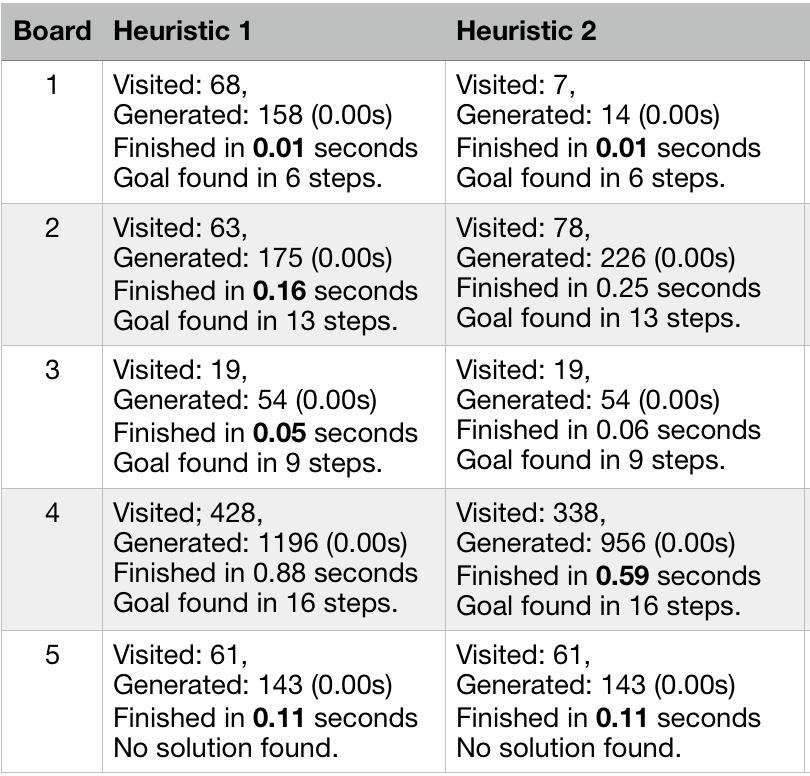

The previous image summarizes the results obtained after running A* search on the 5 boards and the 2 heuristics.

The heuristics solved 4 of the 5 problems with which we tested them. The fifth problem was an impossible board, so we expected that it was not solved.

There were no differences in the number of steps to reach the goal position, but there were some differences in the time to complete the task as well as the number of nodes visited and generated. In the 5 boards tested, there were 2 pairs, heuristic 1 got the best time twice, and heuristic 2 got the best time once. Nevertheless, it is important to measure how much time was saved in total. Therefore we obtained the total time and the average spent in both heuristics:

- Total time Heuristic 1 = 1.21
- Average time Heuristic 1 = 0.242
- Total time Heuristic 2 = 1.02
- Average time Heuristic 2 = 0.204

Even when heuristic 2 obtained the best time only once, it saved 0.19 seconds in the total time and 0.038 seconds in the average time. So we conclude that, based strictly on the time saved, heuristic 2 is the best for this problem. This little difference could be imperceptible for small problems like the one that we solved in this assignment; but it could become relevant in bigger boards.

This assignment was helpful to understand the differences in the performance of different heuristics, even when using the same search algorithm. Since we used the code used in assignment 3, the most challenging step was to capture in Phyton code the heuristics that we could imagine to solve this problem.